# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import talib
import yfinance as yf
import nltk
import pynance as pn

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
import os
print(os.getcwd())

c:\Users\Antifragile\Documents\stock-analysis\notebooks


# Load and prepare data

In [2]:
# Load and prepare data
amzn_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'])


In [3]:
import pandas as pd

# Load all CSVs into separate DataFrames
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
dfs = {}

for ticker in tickers:
    df = aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'])
    df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    df.sort_values("Date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs[ticker] = df


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16316\1776569434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16316\1776569434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16316\1776569434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.so

In [4]:
# Inspect the index 
print(amzn_data.index)

# Inspect the columns
print(amzn_data.columns)

# Select only the last 10 observations of `Close`
ts = amzn_data['Close'][-10:]

# Check the type of `ts` 
type(ts)

RangeIndex(start=0, stop=6846, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


pandas.core.series.Series

In [5]:
amzn_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'])
amzn_data.set_index('Date', inplace=True)

In [9]:
# Ensure required columns
for df in [amzn_data]:
    df.columns = df.columns.str.lower()  # Normalize column names
    required_cols = ['open', 'high', 'low', 'close', 'volume']  # 'date' removed
    assert all(col in df.columns for col in required_cols), f"Missing columns in {df}"

In [7]:

# Load data and set Date as index (do this only once)
amzn_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'])
amzn_data.set_index('Date', inplace=True)

# Inspect the first rows of November-December 2006
print(amzn_data.loc['2006-11-01':'2006-12-31'].head())

# Inspect the first rows of 2007 
print(amzn_data.loc['2007'].head())

# Inspect November 2006 by integer location (if needed)
print(amzn_data.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(amzn_data.loc['2006-11-01':'2006-12-31'][['Open', 'Close']].head())
print(amzn_data.loc['2007'][['Open', 'Close']].head())

              Open    High     Low   Close  Adj Close     Volume  Dividends  \
Date                                                                          
2006-11-01  1.9065  1.9100  1.8730  1.8780     1.8780  133378000        0.0   
2006-11-02  1.8665  1.8885  1.8555  1.8725     1.8725  108946000        0.0   
2006-11-03  1.8805  1.8855  1.8435  1.8730     1.8730  102482000        0.0   
2006-11-06  1.8820  1.9175  1.8765  1.9105     1.9105   90818000        0.0   
2006-11-07  1.9100  1.9500  1.9020  1.9385     1.9385  154902000        0.0   

            Stock Splits  
Date                      
2006-11-01           0.0  
2006-11-02           0.0  
2006-11-03           0.0  
2006-11-06           0.0  
2006-11-07           0.0  
              Open    High     Low   Close  Adj Close     Volume  Dividends  \
Date                                                                          
2007-01-03  1.9340  1.9530  1.9025  1.9350     1.9350  248102000        0.0   
2007-01-04  1.9295  

In [10]:
# Sample 20 rows
sample = amzn_data.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_amzn = amzn_data.resample('M')

# Print `monthly_aapl`
print(monthly_amzn)

                  open        high         low       close   adj close  \
Date                                                                     
2021-07-19  176.628998  177.510498  174.957993  177.479507  177.479507   
2018-07-11   86.899498   87.848000   86.699997   87.750000   87.750000   
2011-07-07   10.754500   10.890000   10.754500   10.837000   10.837000   
2013-11-15   18.381500   18.645000   18.277500   18.458500   18.458500   
2003-03-24    1.354000    1.363000    1.310000    1.311500    1.311500   
2013-01-09   13.408500   13.475000   13.270000   13.317500   13.317500   
2006-09-29    1.600500    1.617000    1.577000    1.606000    1.606000   
2008-02-13    3.749500    3.942500    3.663500    3.886500    3.886500   
2011-06-08    9.372500    9.490500    9.316000    9.402500    9.402500   
2010-09-01    6.318000    6.630000    6.308500    6.624500    6.624500   
2004-11-29    1.980000    1.981000    1.885500    1.947000    1.947000   
2023-06-06  125.070000  127.400002  12

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16316\1410252434.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_amzn = amzn_data.resample('M')


In [13]:
# Add a column `diff` to `amzn` 
amzn_data['diff'] = amzn_data.open - amzn_data.close

# Delete the new `diff` column
del amzn_data['diff']

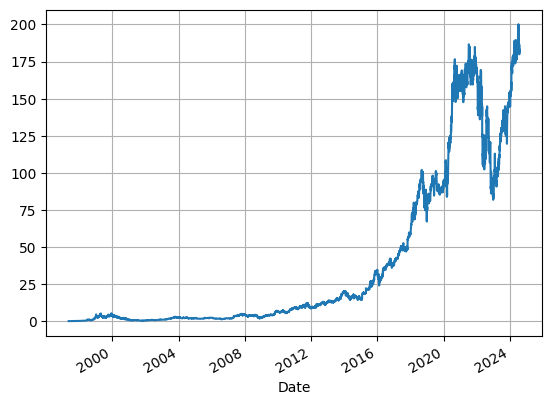

In [ ]:
# Plot the closing prices for `amzn`
amzn_data['Close'].plot(grid=True)

# Show the plot
plt.show()

In [ ]:
# Assign `Adj Close` to `daily_close`
daily_close = amzn_data[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
1997-05-15   0.000000
1997-05-16  -0.117028
1997-05-19  -0.012040
1997-05-20  -0.042685
1997-05-21  -0.127392
...               ...
2024-07-24  -0.029934
2024-07-25  -0.005419
2024-07-26   0.014734
2024-07-29   0.003836
2024-07-30  -0.008133

[6846 rows x 1 columns]
            Adj Close
Date                 
1997-05-15        NaN
1997-05-16  -0.124461
1997-05-19  -0.012114
1997-05-20  -0.043623
1997-05-21  -0.136269
...               ...
2024-07-24  -0.030391
2024-07-25  -0.005434
2024-07-26   0.014627
2024-07-29   0.003828
2024-07-30  -0.008166

[6846 rows x 1 columns]


In [ ]:
# Resample `amzn` to business months, take last observation as value 
monthly = amzn_data.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `amzn` to quarters, take the mean as value per quarter
quarter = amzn_data.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\701808522.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = amzn_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\701808522.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = amzn_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\701808522.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = amzn_data.resample("4M").mean()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1997-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-30,0.386762,0.414564,0.473927,0.488716,0.488716,-0.762538,NaN,NaN
1998-01-31,0.919835,0.901488,0.928487,0.901894,0.901894,0.174658,NaN,NaN
1998-05-31,0.515480,0.507653,0.522921,0.514566,0.514566,1.537742,NaN,NaN
1998-09-30,1.415035,1.472990,1.372604,1.430004,1.430004,1.601781,NaN,inf
...,...,...,...,...,...,...,...,...
2023-05-31,0.049441,0.046918,0.055956,0.052306,0.052306,-0.182281,NaN,NaN
2023-09-30,0.288118,0.283574,0.290528,0.285027,0.285027,-0.147731,NaN,NaN
2024-01-31,0.083743,0.083700,0.086098,0.086650,0.086650,-0.107311,NaN,NaN


In [ ]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
1997-05-15        NaN
1997-05-16  -0.117028
1997-05-19  -0.012040
1997-05-20  -0.042685
1997-05-21  -0.127392
...               ...
2024-07-24  -0.029934
2024-07-25  -0.005419
2024-07-26   0.014734
2024-07-29   0.003836
2024-07-30  -0.008133

[6846 rows x 1 columns]


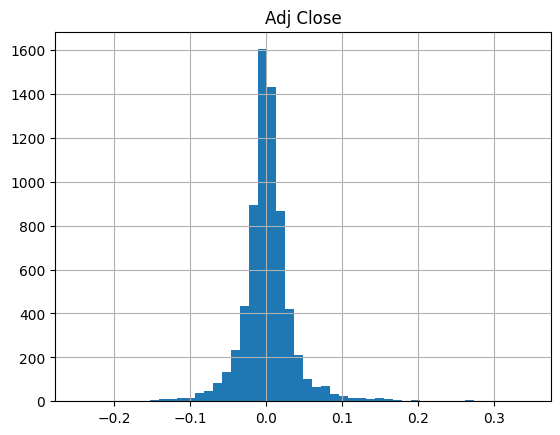

         Adj Close
count  6845.000000
mean      0.001716
std       0.035429
min      -0.247661
25%      -0.013028
50%       0.000409
75%       0.014671
max       0.344714


In [ ]:

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [ ]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

              Adj Close
Date                   
1997-05-15          NaN
1997-05-16     0.882972
1997-05-19     0.872341
1997-05-20     0.835105
1997-05-21     0.728719
...                 ...
2024-07-24  1846.768238
2024-07-25  1836.759805
2024-07-26  1863.823481
2024-07-29  1870.972362
2024-07-30  1855.755492

[6846 rows x 1 columns]


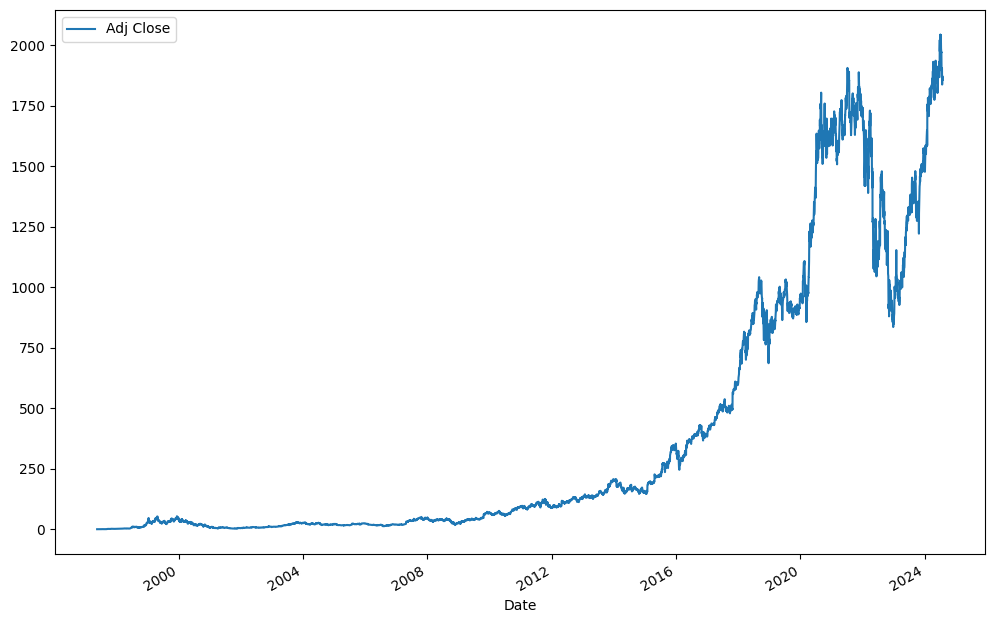

In [ ]:
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [15]:
# Isolate the adjusted closing prices 
adj_close_px = amzn_data['adj close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2024-07-17    188.089250
2024-07-18    188.094500
2024-07-19    188.094000
2024-07-22    188.079500
2024-07-23    188.213500
2024-07-24    188.215500
2024-07-25    188.158001
2024-07-26    188.170000
2024-07-29    188.267000
2024-07-30    188.398750
Name: adj close, dtype: float64

In [18]:
# Technical Indicators (TA-Lib)
amzn_data['SMA20'] = talib.SMA(amzn_data['close'], timeperiod=20)
amzn_data['RSI'] = talib.RSI(amzn_data['close'], timeperiod=14)
amzn_data['MACD'], amzn_data['MACD_signal'], amzn_data['MACD_hist'] = talib.MACD(
    amzn_data['close'], fastperiod=12, slowperiod=26, signalperiod=9
)


#Moving Windows

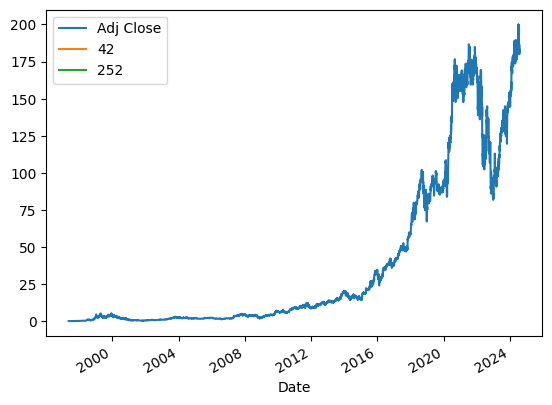

In [ ]:
# Short moving window rolling mean
amzn_data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
amzn_data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
amzn_data[['Adj Close', '42', '252']].plot()

plt.show()

In [21]:
daily_close = amzn_data[['adj close']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)

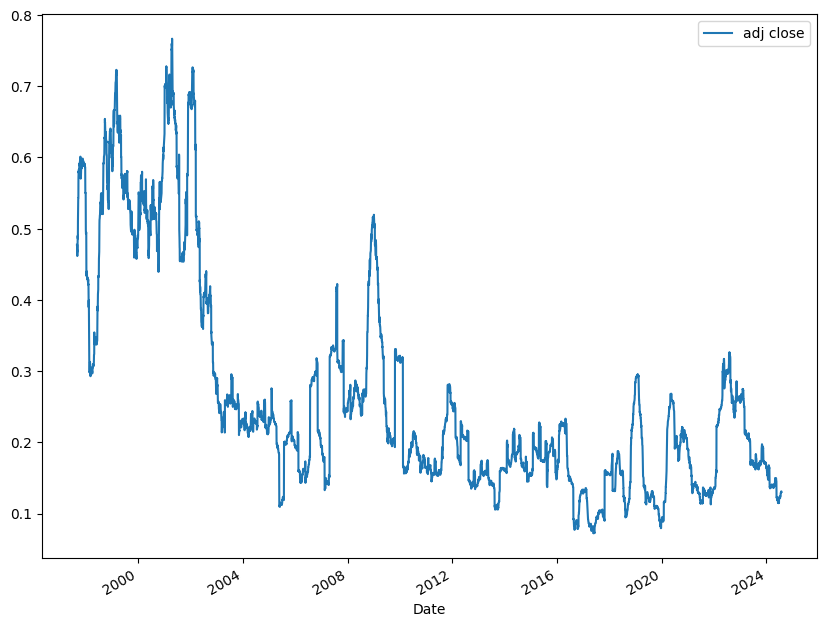

In [22]:
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [ ]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=amzn_data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = amzn_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = amzn_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\3713577510.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\2927412502.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(signals.loc[signals.positions == 1.0].index,


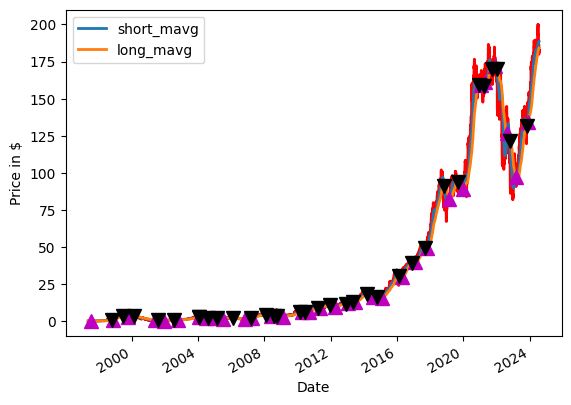

In [ ]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
amzn_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

         

In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['amzn'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(amzn_data['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(amzn_data['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(amzn_data['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

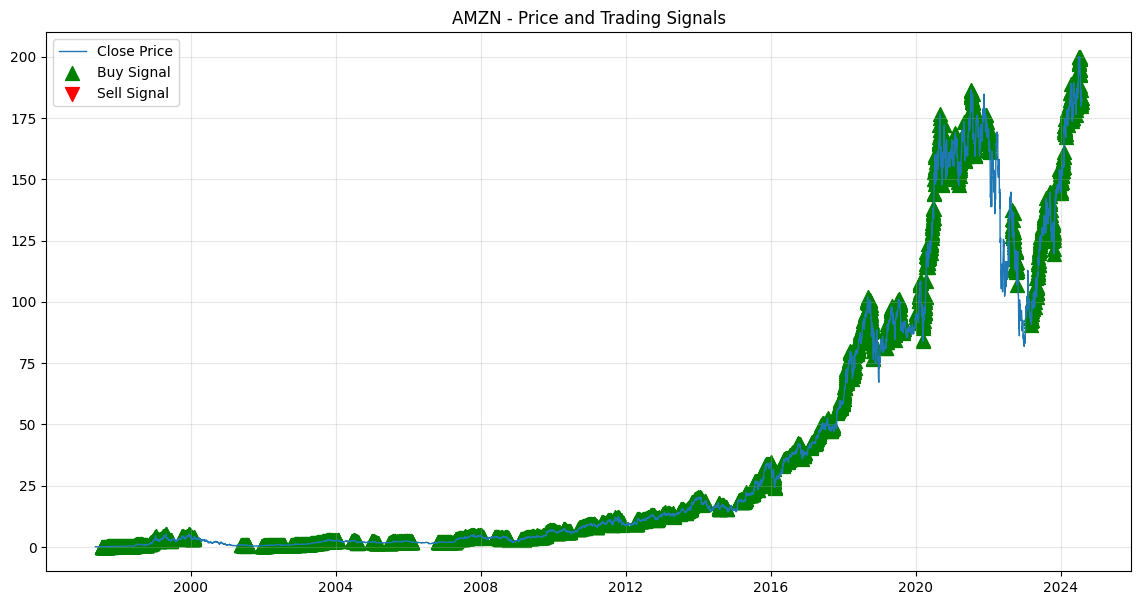

In [ ]:
# Filter buy and sell signals
buy_signals = signals[signals['signal'] == 1]
sell_signals = signals[signals['signal'] == -1]

plt.figure(figsize=(14, 7))
plt.plot(amzn_data.index, amzn_data['Close'], label='Close Price', linewidth=1)

# Use amzn_data for y-values, but only for indices present in both
plt.scatter(
    buy_signals.index, 
    amzn_data.loc[buy_signals.index, 'Close'], 
    color='green', marker='^', s=100, label='Buy Signal'
)
plt.scatter(
    sell_signals.index, 
    amzn_data.loc[sell_signals.index, 'Close'], 
    color='red', marker='v', s=100, label='Sell Signal'
)

plt.title('AMZN - Price and Trading Signals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Sharpe Ratio

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.3528552655008724


#Maximum Drawdown

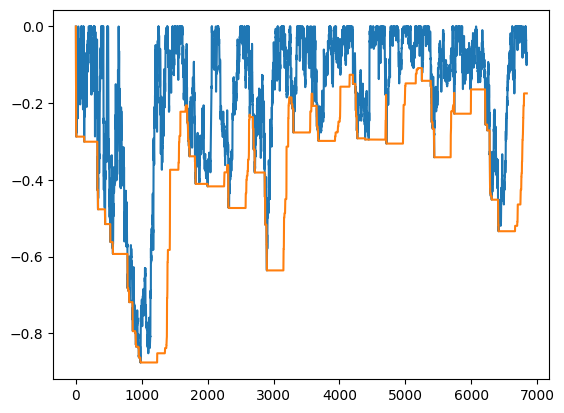

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl_data['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl_data['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
# Show the plot
plt.show()

In [ ]:
# Get the number of days in `aapl`
days = (amzn_data.index[-1] - amzn_data.index[0]).days

# Calculate the CAGR 
cagr = ((((amzn_data['Adj Close'][-1]) / amzn_data['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.32443463172314657


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_14760\24933030.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((amzn_data['Adj Close'][-1]) / amzn_data['Adj Close'][1])) ** (365.0/days)) - 1


#Plot SMA

#Plt MACD

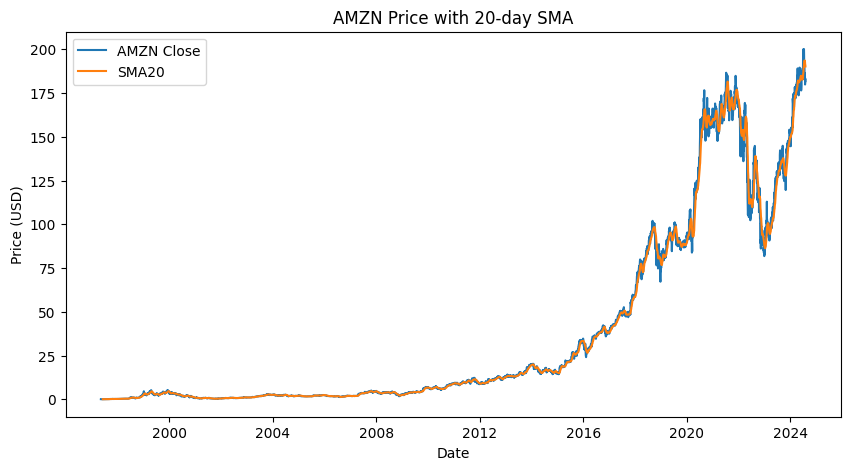

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(amzn_data.index, amzn_data['Close'], label='AMZN Close')
plt.plot(amzn_data.index, amzn_data['SMA20'], label='SMA20')
plt.title('AMZN Price with 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [31]:
amzn_data['RSI'] = talib.RSI(amzn_data['close'], timeperiod=14)

Plot RSI

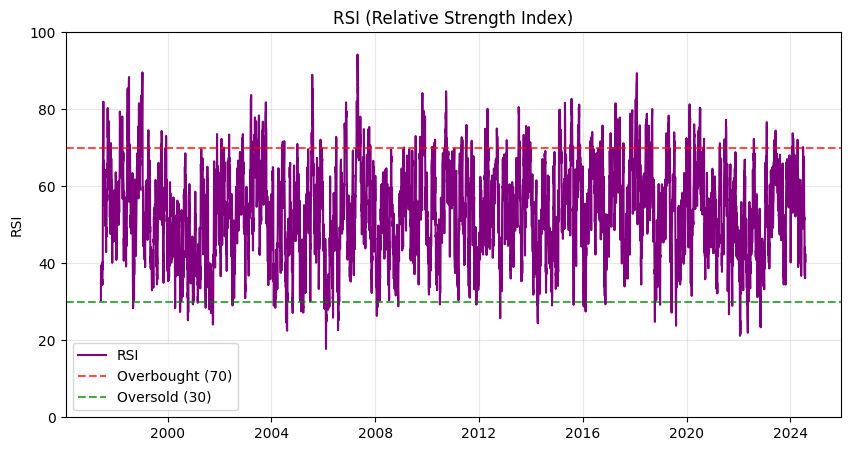

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(amzn_data.index, amzn_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()

#Plot Bollinger

In [27]:
# Calculate Bollinger Bands (20-day window, 2 std)
window = 20
amzn_data['SMA20'] = amzn_data['close'].rolling(window).mean()
amzn_data['BB_Upper'] = amzn_data['SMA20'] + 2 * amzn_data['close'].rolling(window).std()
amzn_data['BB_Lower'] = amzn_data['SMA20'] - 2 * amzn_data['close'].rolling(window).std()

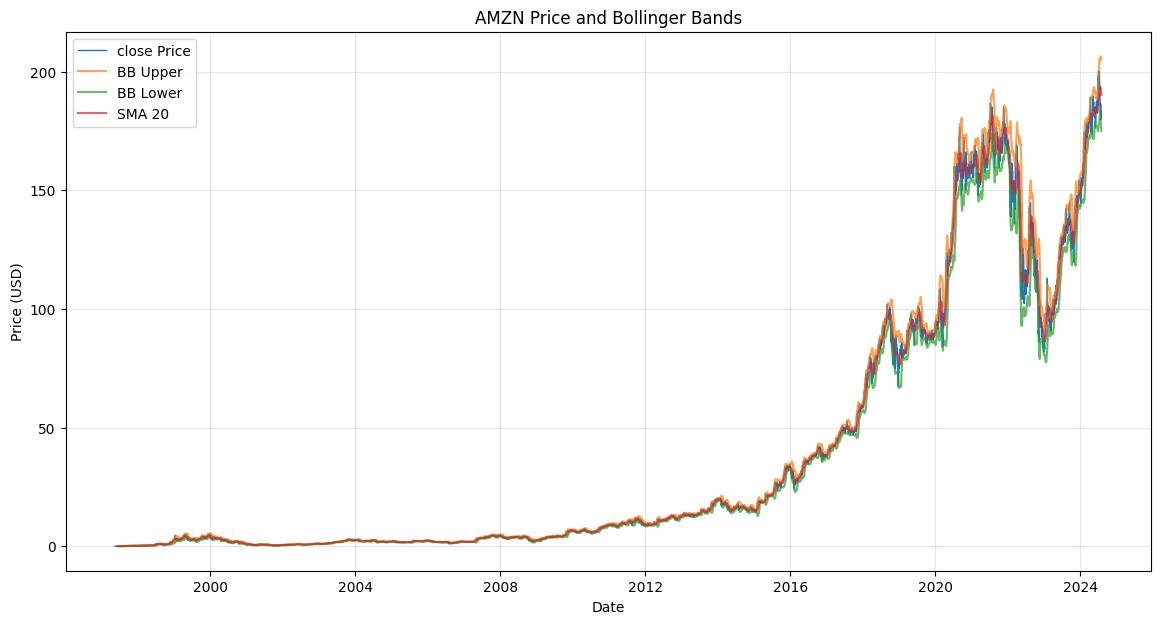

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Plot Close price
plt.plot(amzn_data.index, amzn_data['close'], label='close Price', linewidth=1)

# Plot Bollinger Bands (make sure you have calculated these columns first)
plt.plot(amzn_data.index, amzn_data['BB_Upper'], label='BB Upper', alpha=0.7)
plt.plot(amzn_data.index, amzn_data['BB_Lower'], label='BB Lower', alpha=0.7)
plt.plot(amzn_data.index, amzn_data['SMA20'], label='SMA 20', alpha=0.7)

plt.fill_between(amzn_data.index, amzn_data['BB_Upper'], amzn_data['BB_Lower'], alpha=0.1)

plt.title('AMZN Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()